## Importando Bibliotecas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importando o dataset

In [15]:
frame = pd.read_csv('netflix1.csv')
frame

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [16]:
# Checking if we have null values in our dataframe.
frame.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [17]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [18]:
# Converting the type of some columns
frame = frame.astype({"date_added": "datetime64[ns]"})
frame.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [19]:
frame.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [20]:
# Searching how many movies don't have the director especified.
frame.loc[frame['director'] == 'Not Given']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,2021-09-17,2021,TV-MA,1 Season,TV Comedies
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [21]:
count_country = frame['country'].value_counts()

# Altearndo o país Soviet Union para Russia.
frame.loc[frame['country'] == 'Soviet Union', 'country'] = 'Russia'
# frame.loc[frame['country'] == 'Soviet Union']
count_country

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [28]:
# In order to be easier to see the country's, we gonna create a column informing the region.
country_to_region = {
    'United States': 'NA',
    'Canada': 'NA',
    'India' : 'APAC',
    'United Kingdom': 'EMEA',
    'Pakistan': 'APAC',
    'West Germany': 'EMEA',
    'Greece': 'EMEA',
    'Zimbabew': 'APAC',
    'Russia': 'EMEA',
    'France': 'EMEA',
    'Brazil': 'LATAM',
    'Mexico': 'LATAM',
    'Colombia': 'LATAM',
    'Peru': 'LATAM',
    'Argentina': 'LATAM',
    'Puerto Rico': 'LATAM',
    'Venezuela': 'LATAM',
    'Paraguay': 'LATAM',
    'Uruguay': 'LATAM',
    'Jamaica': 'LATAM',
    'Guatemala': 'LATAM',
    'Chile': 'LATAM',
    'Switzerland': 'EMEA',
    'Mozambique': 'EMEA',
    'Turkey': 'EMEA',
    'Italy': 'EMEA',
    'Germany': 'EMEA',
    'Poland': 'EMEA',
    'Norway': 'EMEA',
    'Spain': 'EMEA',
    'Sweden': 'EMEA',
    'Ireland': 'EMEA',
    'Ukraine': 'EMEA',
    'Belgium': 'EMEA',
    'Denmark': 'EMEA',
    'Croatia': 'EMEA',
    'Austria': 'EMEA',
    'Czech Republic': 'EMEA',
    'Bulgaria': 'EMEA',
    'Romania': 'EMEA',
    'Finland': 'EMEA',
    'Cyprus': 'EMEA',
    'New Zealand': 'EMEA',
    'Belarus': 'EMEA',
    'Netherlands': 'EMEA',
    'Mauritius': 'EMEA',
    'Jordan': 'EMEA',
    'Zimbabwe': 'EMEA',
    'Portugal': 'EMEA',
    'Egypt': 'EMEA',
    'Senegal': 'EMEA',
    'Cameroon':'EMEA',
    'Namibia': 'EMEA',
    'Ghana': 'EMEA',    
    'Kenya': 'EMEA',
    'Georgia': 'EMEA',
    'Hungary': 'EMEA',
    'Serbia': 'EMEA',
    'Somalia': 'EMEA',
    'Luxembourg': 'EMEA',
    'Slovenia': 'EMEA',
    'Israel': 'APAC',
    'Iceland': 'APAC',
    'Cambodia': 'APAC',
    'Malaysia': 'APAC',
    'Singapore': 'APAC',
    'Hong Kong': 'APAC',
    'Australia': 'APAC',
    'South Korea': 'APAC',
    'Taiwan': 'APAC',
    'Japan': 'APAC',
    'China': 'APAC',
    'Thailand': 'APAC',
    'South Africa': 'APAC',
    'Nigeria': 'APAC',
    'Philippines': 'APAC',
    'Indonesia': 'APAC',
    'Nigeria': 'APAC',
    'Nigeria': 'APAC',
    'Vietnam': 'APAC',
    'Kuwait': 'APAC',
    'Saudi Arabia': 'APAC',
    'Lebanon': 'APAC',
    'Syria': 'APAC',
    'United Arab Emirates': 'APAC',
    'Bangladesh': 'APAC',
    'Iran': 'APAC',
    'Syria': 'APAC',
    'Not Given': 'TBD'
    
}
frame['region'] = frame['country'].map(country_to_region)
#Confiarmando se temos mais algum que não tem região.
# null_region = frame.loc[frame['region'].isna()]
# null_region

<Axes: ylabel='region'>

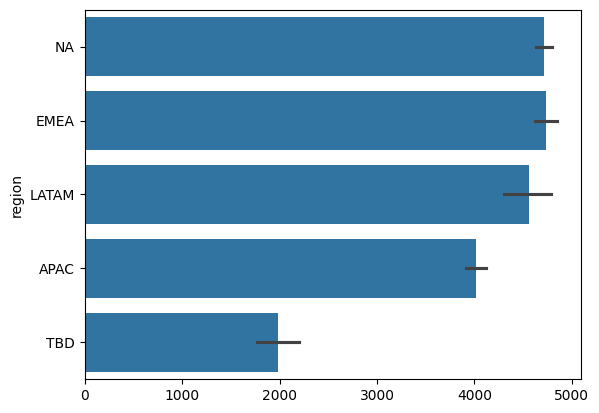

In [31]:
# Let's see how many contries do we have
sns.barplot(frame['region'])

TypeError: 'Axes' object is not subscriptable

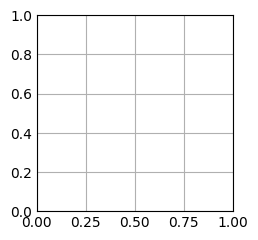

In [38]:
# plt.style.use('_mpl-gallery')

# # make data:
# # x = 0.5  np.arange(8)
# # y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# # plot
# fig, df = plt.subplots()

# df.bar(df['region'],  width=1, edgecolor="white", linewidth=0.7)

# df.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

# plt.show()